___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [ ]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uncomment the following lines if you want to suppress warnings:
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [ ]:
# Get python version
!python --version

Python 3.10.12


In [ ]:
# Get tensorflow version
import tensorflow as tf

tf.__version__

'2.12.0'

In [ ]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [40]:
df = pd.read_csv("/content/drive/MyDrive/Clarusway_Assignment/Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [ ]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

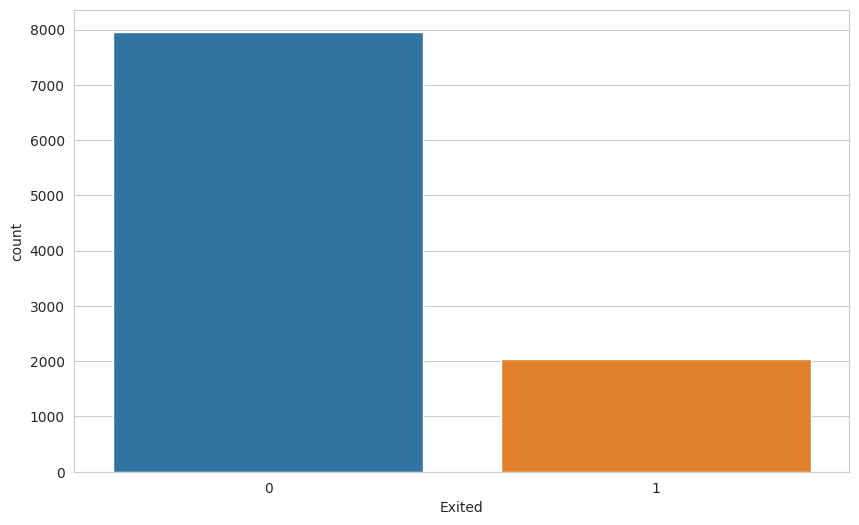

In [ ]:
sns.countplot(x = df["Exited"])

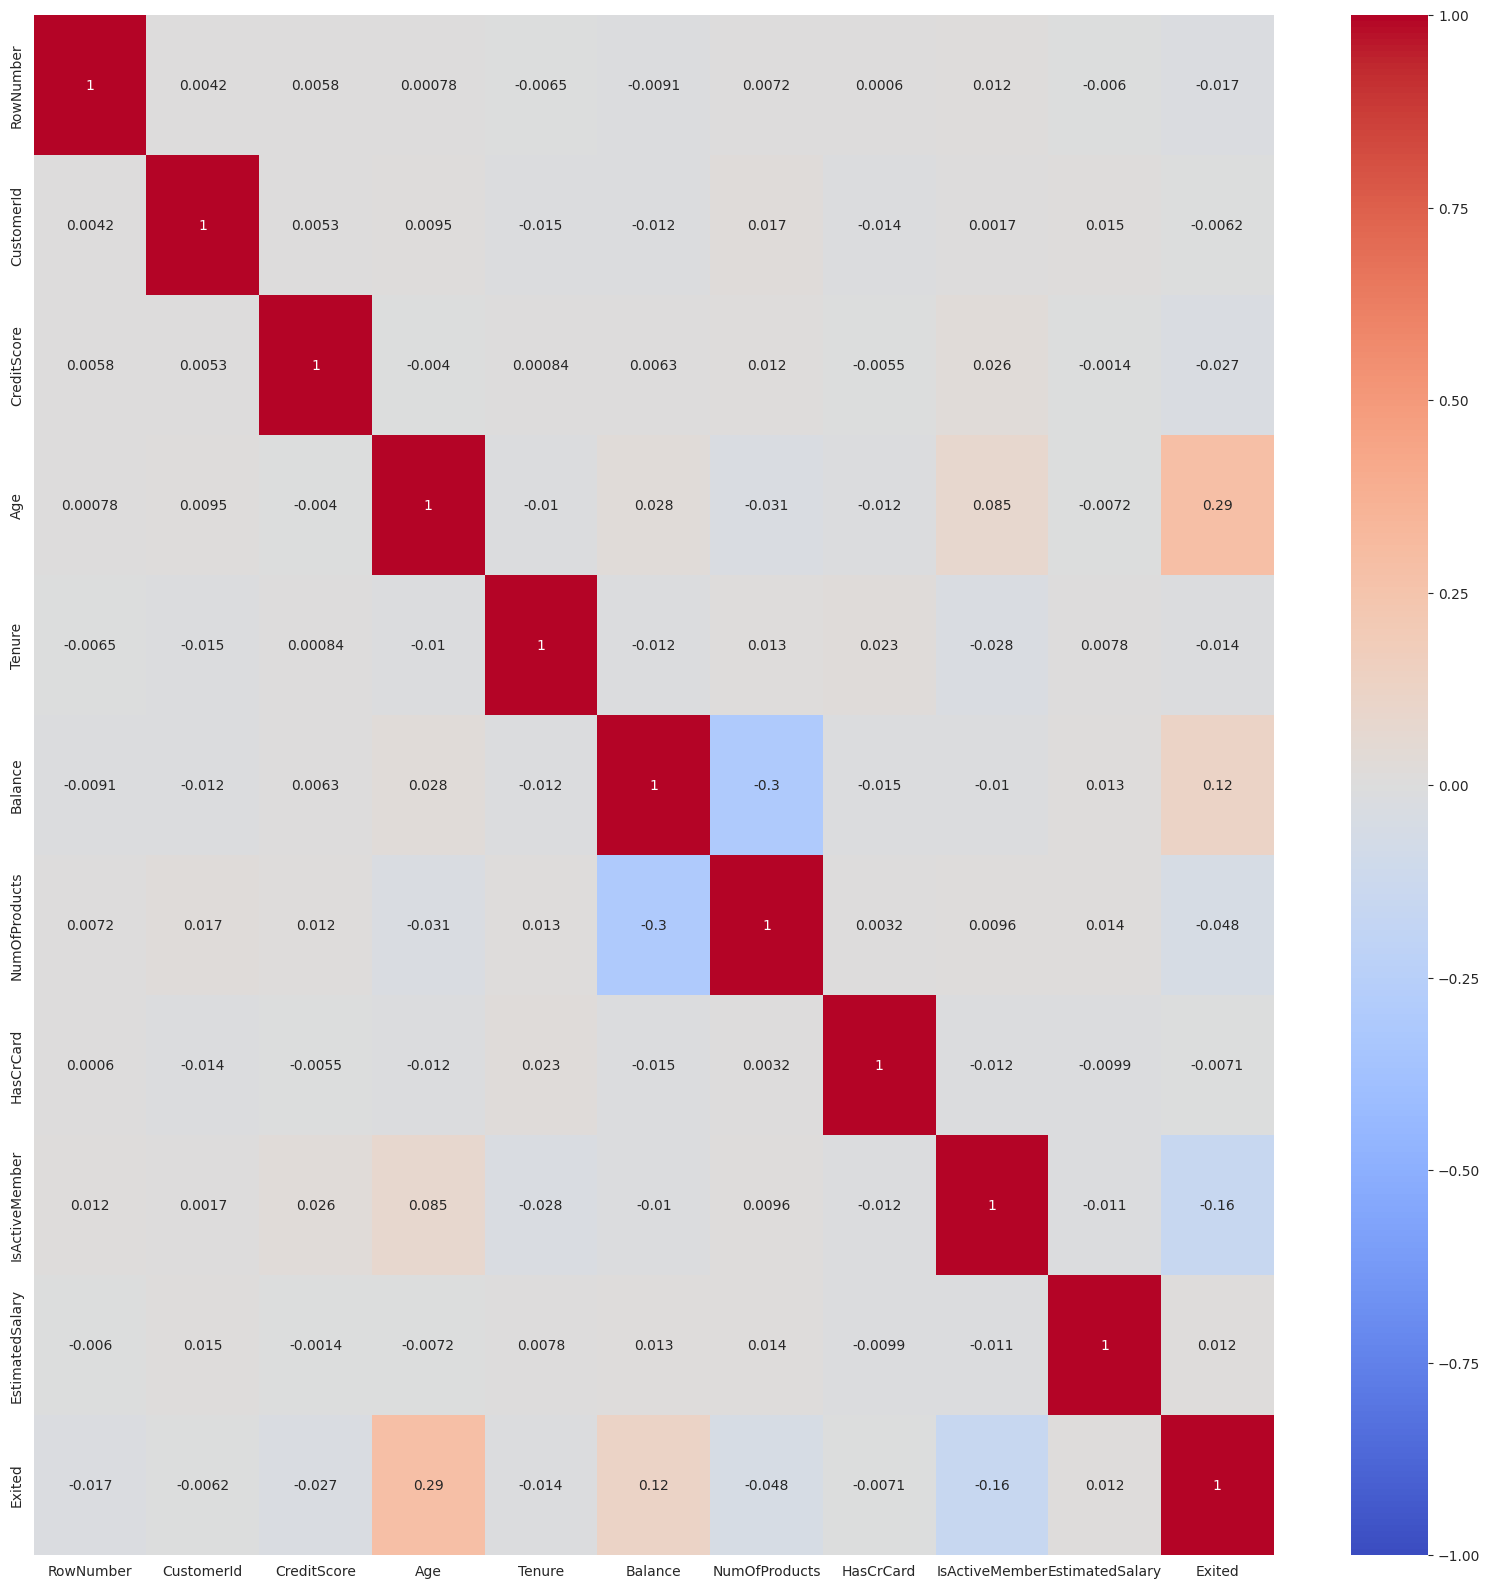

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

In [ ]:
drop_list = ["RowNumber", "CustomerId", "Surname", "Geography"]

In [41]:
df = df.drop(drop_list, axis = 1)

In [42]:
df.shape

(10000, 10)

<ipython-input-23-924c683a0926>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")


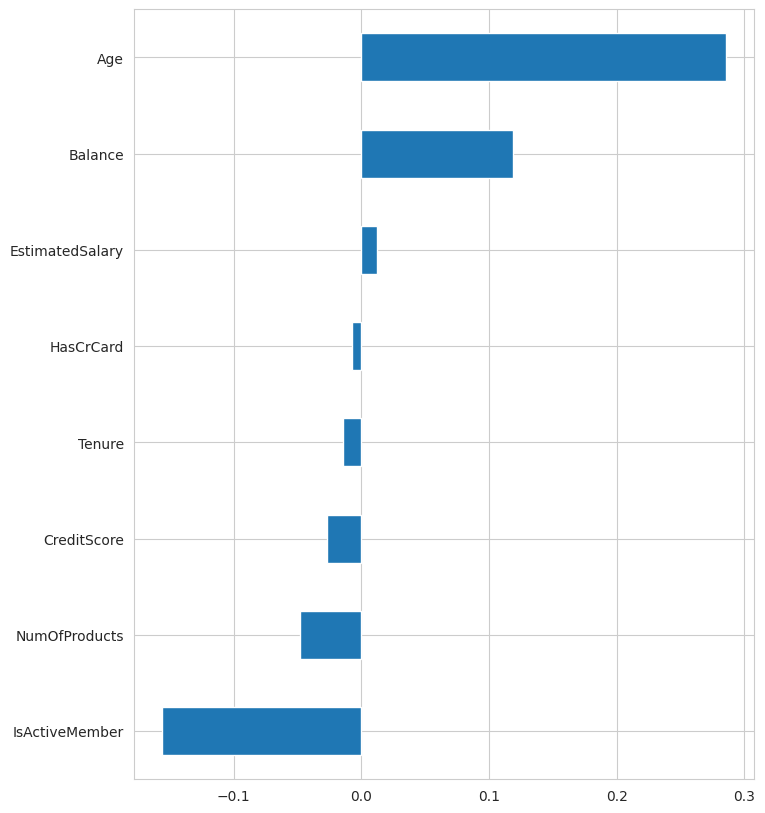

In [ ]:
plt.figure(figsize=(8, 10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")
plt.show()

# correrlation 이 네거티브지만 강력한것을 확인 할 수 있다.

In [43]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Female,43,2,125510.820,1,1,1,79084.100,0


In [44]:
# redefine df["Gender"]
# Male = 0
# Female = 1
df["Gender"] = df["Gender"].apply(lambda x : 0 if x == "Male" else 1)

In [45]:
df["Gender"]

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Gender, Length: 10000, dtype: int64

# Preprocessing of Data
- Train | Test Split, Scalling

In [47]:
from sklearn.model_selection import train_test_split # to cresat our train,test set.
from sklearn.preprocessing import MinMaxScaler

In [68]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [69]:
seed = 42

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=seed
)

In [71]:
scaler = MinMaxScaler()

In [72]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [74]:
X_train.shape # 9 Features 가 있다.

(9000, 9)

In [75]:
X_test.shape

(1000, 9)

In [76]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(14, activation="relu", input_dim=X_train.shape[1]))  # 9 features X 1.5 = 13.5
model.add(Dense(7, activation="relu"))
model.add(Dense(3, activation="relu"))
model.add(Dense(1, activation="sigmoid")) # binary classification (이진분류)가 필요하기때문에 sigmoid 사용.

# model.add(Dense(4, activation="softmax")) : 마지막 Output layer의 뉴런이 4개일 정우 softmax classification 사용.

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [77]:
model.fit(
    x=X_train, y=y_train, validation_split=0.2, batch_size=32, epochs=100, verbose=1
)

Epoch 1/100
225/225 [==============================] - 3s 5ms/step - loss: 0.6160 - accuracy: 0.7206 - val_loss: 0.5120 - val_accuracy: 0.7917
Epoch 2/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4928 - accuracy: 0.7975 - val_loss: 0.4898 - val_accuracy: 0.7917
Epoch 3/100
225/225 [==============================] - 1s 4ms/step - loss: 0.4761 - accuracy: 0.7975 - val_loss: 0.4756 - val_accuracy: 0.7917
Epoch 4/100
225/225 [==============================] - 1s 4ms/step - loss: 0.4642 - accuracy: 0.7975 - val_loss: 0.4621 - val_accuracy: 0.7917
Epoch 5/100
225/225 [==============================] - 1s 4ms/step - loss: 0.4492 - accuracy: 0.8057 - val_loss: 0.4435 - val_accuracy: 0.8100
Epoch 6/100
225/225 [==============================] - 1s 6ms/step - loss: 0.4340 - accuracy: 0.8160 - val_loss: 0.4271 - val_accuracy: 0.8267
Epoch 7/100
225/225 [==============================] - 1s 6ms/step - loss: 0.4219 - accuracy: 0.8197 - val_loss: 0.4176 - val_accuracy: 0.8272

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 14)                140       
                                                                 
 dense_5 (Dense)             (None, 7)                 105       
                                                                 
 dense_6 (Dense)             (None, 3)                 24        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [79]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.616,0.721,0.512,0.792
1,0.493,0.798,0.490,0.792
2,0.476,0.798,0.476,0.792
3,0.464,0.798,0.462,0.792
4,0.449,0.806,0.443,0.810


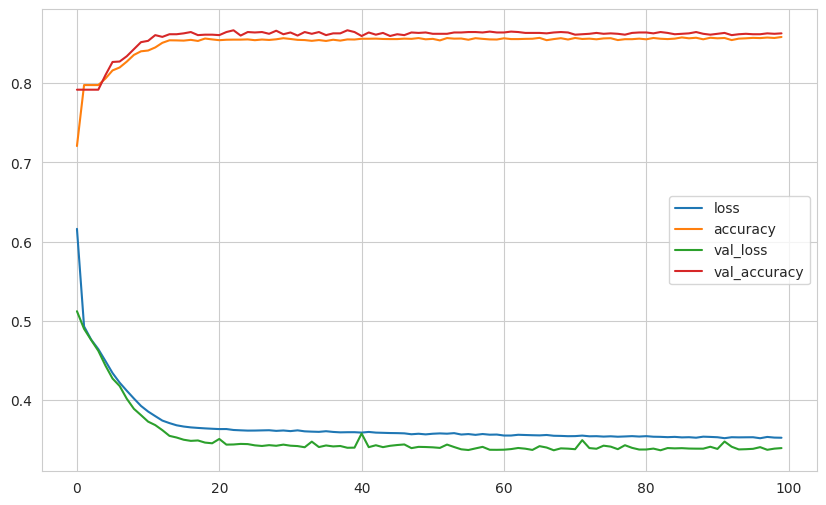

In [80]:
loss_df.plot()
plt.show()

In [81]:
model.evaluate(X_test, y_test, verbose=0)

[0.3571488857269287, 0.8489999771118164]

In [82]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3571488857269287
accuracy:  0.8489999771118164


In [83]:
y_pred = model.predict(X_test) > 0.5 # keras prediction 사용중, 50% 가 디폴트임.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# 1에 대한 값은 상당히 괜찮은것을 확인 할 수 있다.

32/32 [==============================] - 0s 1ms/step
[[775  21]
 [130  74]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.78      0.36      0.49       204

    accuracy                           0.85      1000
   macro avg       0.82      0.67      0.70      1000
weighted avg       0.84      0.85      0.83      1000



## without class_weigth

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005) # 디폴트는 0.001 인데 우리는 이걸 증가시켰다.
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
)

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Add Dropout Layer

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

### Add Early Stop

#### Monitor the "val_loss" as metric

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

# The patience is often set somewhere between 10 and 100
# (10 or 25 is more common), but it really depends on your dataset and network.

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
)

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#### Monitor the "val_recall" as metric

## Optuna

In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [ ]:
trial_metric = "accuracy"
batch_size = 64


def create_model(trial): # get some paramiters as trial
    # Some hyperparameters we want to optimize
    first_hidden_layer = trial.suggest_int("first_hidden_layer", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(first_hidden_layer, input_dim=X_train.shape[1], activation="relu"))

    # you can add the hidden layers automatically, see the example below:
    hidden_layers = trial.suggest_int("hidden_layers", 2, 6)
    for i in range(hidden_layers):
      hidden_layer_units = "hidden_layer_units_" + str(i)
      hidden_layer_units = trial.suggest_int(hidden_layer_units, 8, 128)
      model.add(Dense(hidden_layer_units, activation="relu"))


    # we decided to use one neuron with sigmoid func in the output layer
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [ ]:
study = optuna.create_study(direction="maximize") # optuna 가 뭔지에 대해서 따로 공부가 필요할것같다.
study.optimize(objective, n_trials=10)
study.best_params

# 가장 좋은 paramiters를 알려줌.

In [ ]:
# build model with optuna parameters
input_layer_units, hidden_layers, optimizer, lr, w0, w1 = (
    study.best_params["input_layer_units"],
    study.best_params["hidden_layers"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

# modify the hidden layers' neuron numbers according to the output of the previous code block
hidden_layer_units_1, hidden_layer_units_2, hidden_layer_units_3, hidden_layer_units_4 = (
    study.best_params["hidden_layer_units_0"],
    study.best_params["hidden_layer_units_1"],
    study.best_params["hidden_layer_units_2"],
    study.best_params["hidden_layer_units_3"],
    #study.best_params["hidden_layer_units_4"]
)

hidden_layer_units = [
             hidden_layer_units_1,
             hidden_layer_units_2,
             hidden_layer_units_3,
             hidden_layer_units_4,
             #hidden_layer_units_5
             ]

tf.random.set_seed(42)
# instantiate the model
model = Sequential()
model.add(Dense(input_layer_units, activation="relu"))

for i in range(hidden_layers):
  model.add(Dense(hidden_layer_units[i], activation="relu"))

model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

In [ ]:
history = model.history.history

In [ ]:
model.summary()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

---

In [ ]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
roc_auc_score(y_test, y_pred_proba)

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___